In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df["type"].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [4]:
plu_codes = {
    "4046": "n_hass_small",
    "4225": "n_hass_large",
    "4770": "n_hass_xlarge"
}
df.rename(columns=plu_codes, inplace=True)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,n_hass_small,n_hass_large,n_hass_xlarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
columns_rename_map = {
    "Date": "date",
    "AveragePrice": "average_price",
    "Total Volume": "total_volume",
    "region": "region",
    "type": "type",
    "n_hass_small": "n_hass_small",
    "n_hass_large": "n_hass_large",
    "n_hass_xlarge": "n_hass_xlarge"
}
id_vars = ["date", "average_price", "total_volume", "region", "type"]
values = ["n_hass_small", "n_hass_large", "n_hass_xlarge" ]

df = df.rename(columns=columns_rename_map)
sub_df = df[id_vars + values]
sub_df = sub_df.melt(id_vars=id_vars, var_name="plu_type", value_name="n_avocados")
sub_df.sort_values(by=["region", "type", "plu_type", "date"], inplace=True)

sub_df.head(20)

,date,average_price,total_volume,region,type,plu_type,n_avocados
18300,2015-01-04,1.22,40873.28,Albany,conventional,n_hass_large,28287.42
18299,2015-01-11,1.24,41195.08,Albany,conventional,n_hass_large,31640.34
18298,2015-01-18,1.17,44511.28,Albany,conventional,n_hass_large,31540.32
18297,2015-01-25,1.06,45147.50,Albany,conventional,n_hass_large,33196.16
18296,2015-02-01,0.99,70873.60,Albany,conventional,n_hass_large,60017.20
18295,2015-02-08,0.99,51253.97,Albany,conventional,n_hass_large,39111.81
18294,2015-02-15,1.06,41567.62,Albany,conventional,n_hass_large,30045.51
18293,2015-02-22,1.07,45675.05,Albany,conventional,n_hass_large,35056.13
18292,2015-03-01,0.99,55595.74,Albany,conventional,n_hass_large,45633.34
18291,2015-03-08,1.07,40507.36,Albany,conventional,n_hass_large,30370.64


## Missing data assessment

In [6]:
diff_days = sub_df.groupby(by=["region", "type", "plu_type"])["date"].diff().dt.days
diff_days.value_counts()

date
7.0     54417
14.0        3
21.0        3
Name: count, dtype: int64

**Conclusions:**
- The data is indeed on a weekly basis.
- For some regions / types of avocados / plu_types there are some weeks in which there are missing values.

## Evaluate number of consecutive weeks

In [7]:
def get_ellapsed_weeks(group):
    min_date = group.min()
    return ((group - min_date).dt.days // 7).sort_values()
    

In [8]:
tmp = sub_df.groupby(by=["region", "type", "plu_type"])["date"].apply(
    get_ellapsed_weeks
).diff().ne(1).cumsum()
tmp.reset_index(level=["region", "type", "plu_type"], drop=True, inplace=True)

tmp = sub_df.groupby(by=["region", "type", "plu_type", tmp]).size().reset_index()
tmp.rename(columns={0: "consecutive_weeks"}, inplace=True)
tmp

,region,type,plu_type,date,consecutive_weeks
0,Albany,conventional,n_hass_large,1,169
1,Albany,conventional,n_hass_small,2,169
2,Albany,conventional,n_hass_xlarge,3,169
3,Albany,organic,n_hass_large,4,169
4,Albany,organic,n_hass_small,5,169
...,...,...,...,...,...
325,WestTexNewMexico,organic,n_hass_small,326,79
326,WestTexNewMexico,organic,n_hass_small,327,39
327,WestTexNewMexico,organic,n_hass_xlarge,328,48
328,WestTexNewMexico,organic,n_hass_xlarge,329,79


In [9]:
avocado_type = "organic"

max_consecutive_weeks = tmp.loc[tmp["type"] == avocado_type,
                                "consecutive_weeks"].max()
print((tmp.loc[tmp["type"] == avocado_type,
              "consecutive_weeks"] == max_consecutive_weeks).all())

print(len(df.loc[df["type"] == avocado_type]))
df.loc[df["type"] == avocado_type].drop_duplicates(subset=["region", "date"]).shape

False
9123


(9123, 14)

In [10]:
avocado_type = "conventional"

max_consecutive_weeks = tmp.loc[tmp["type"] == avocado_type,
                                "consecutive_weeks"].max()
print((tmp.loc[tmp["type"] == avocado_type,
               "consecutive_weeks"] == max_consecutive_weeks).all())

print(len(df.loc[df["type"] == avocado_type]))
df.loc[df["type"] == avocado_type].drop_duplicates(subset=["region", "date"]).shape

True
9126


(9126, 14)

**Conclusions:**
- There are weeks for which there is no data of organic avocados, but all the weeks have data about conventional avocados, and this is not due to duplicates as there aren't duplicates in the dataset. 
- For conventional avocados, there is no missing data for each of the different types of avocados.
- Although there aren't many weeks/regions with missing data for organic avocados, for simplicity I'll focus on conventional avocados.

## Feature engineering and set target value

In [11]:
sub_df = sub_df.loc[sub_df["type"] == "conventional"]
sub_df = sub_df.drop(columns=["type"])

sub_df = sub_df.pivot(index=["date", "region", "total_volume", "average_price"],
                  columns="plu_type", values="n_avocados").reset_index()
sub_df = sub_df.rename_axis(None, axis=1)

sub_df.sort_values(by=["region", "date"], inplace=True)
sub_df.reset_index(drop=True, inplace=True)
sub_df.head()

,date,region,total_volume,average_price,n_hass_large,n_hass_small,n_hass_xlarge
0,2015-01-04,Albany,40873.28,1.22,28287.42,2819.50,49.90
1,2015-01-11,Albany,41195.08,1.24,31640.34,1002.85,127.12
2,2015-01-18,Albany,44511.28,1.17,31540.32,914.14,135.77
3,2015-01-25,Albany,45147.50,1.06,33196.16,941.38,164.14
4,2015-02-01,Albany,70873.60,0.99,60017.20,1353.90,179.32


In [12]:
sub_df["year"] = sub_df["date"].dt.isocalendar().year
sub_df["week"] = sub_df["date"].dt.isocalendar().week
sub_df["year_week"] = sub_df.apply(lambda x: f"{x['year']}_{x['week']:02d}", axis=1)

cols = ["total_volume", "n_hass_large", "n_hass_small", "n_hass_xlarge",
        "average_price"]
grouped = sub_df.groupby(by=["region"])
for col in cols:
    prev_week_factor_name = col + "_prev_week_factor"
    sub_df[prev_week_factor_name] = grouped[col].shift(1) / sub_df[col]

sub_df["price_next_week_factor"] = (grouped["average_price"].shift(-1)
                                    / sub_df["average_price"])

In [13]:
min_change = 0.05
sub_df["price_behavior"] = sub_df["price_next_week_factor"].apply(
    lambda x: ("rise" if x >= 1 + min_change 
               else ("drop" if x <= 1 - min_change else "flat"))
)

In [14]:
target = "price_behavior"
predictors = [
    "region", "year", "week", "average_price", "total_volume", "n_hass_large",
    "n_hass_small", "n_hass_xlarge", "average_price_prev_week_factor",
    "total_volume_prev_week_factor", "n_hass_large_prev_week_factor",
    "n_hass_small_prev_week_factor", "n_hass_xlarge_prev_week_factor"
]

sub_df = sub_df[predictors + [target]].dropna()
sub_df.head()

,region,year,week,average_price,total_volume,n_hass_large,n_hass_small,n_hass_xlarge,average_price_prev_week_factor,total_volume_prev_week_factor,n_hass_large_prev_week_factor,n_hass_small_prev_week_factor,n_hass_xlarge_prev_week_factor,price_behavior
1,Albany,2015,2,1.24,41195.08,31640.34,1002.85,127.12,0.983871,0.992188,0.894030,2.811487,0.392542,drop
2,Albany,2015,3,1.17,44511.28,31540.32,914.14,135.77,1.059829,0.925498,1.003171,1.097042,0.936289,drop
3,Albany,2015,4,1.06,45147.50,33196.16,941.38,164.14,1.103774,0.985908,0.950120,0.971064,0.827160,drop
4,Albany,2015,5,0.99,70873.60,60017.20,1353.90,179.32,1.070707,0.637014,0.553111,0.695310,0.915347,flat
5,Albany,2015,6,0.99,51253.97,39111.81,1357.37,163.25,1.000000,1.382792,1.534503,0.997444,1.098438,rise


## About volume columns

<Axes: >

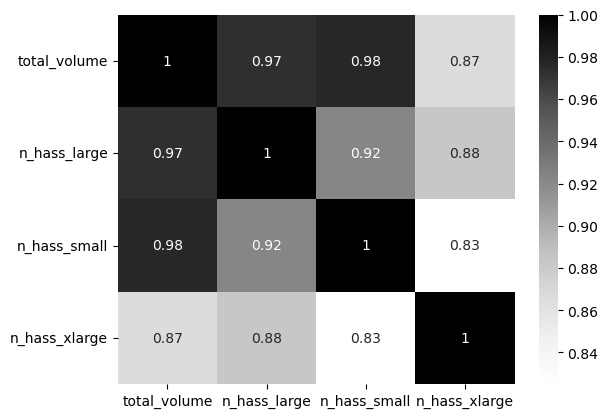

In [15]:
volume_cols = ["total_volume", "n_hass_large", "n_hass_small", "n_hass_xlarge"]

sns.heatmap(sub_df[volume_cols].corr(), annot=True, cmap="Greys")

<Axes: xlabel='relative_volume', ylabel='Percent'>

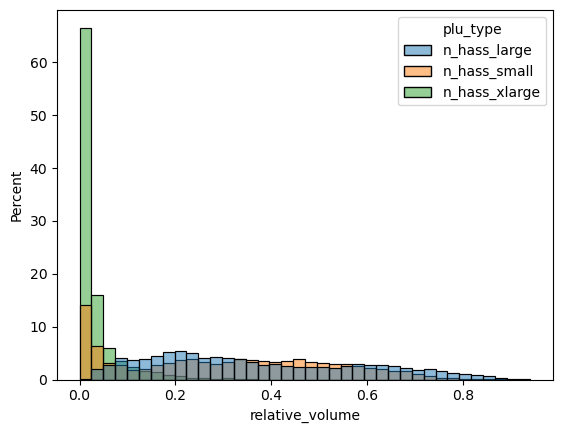

In [16]:
tmp = pd.DataFrame()
for col in volume_cols:
    tmp[col] = sub_df[col] / sub_df["total_volume"]

tmp_melt = tmp.melt(id_vars=["total_volume"], var_name="plu_type", value_name="relative_volume")
sns.histplot(data=tmp_melt, x="relative_volume", hue="plu_type", stat="percent", common_norm=False)

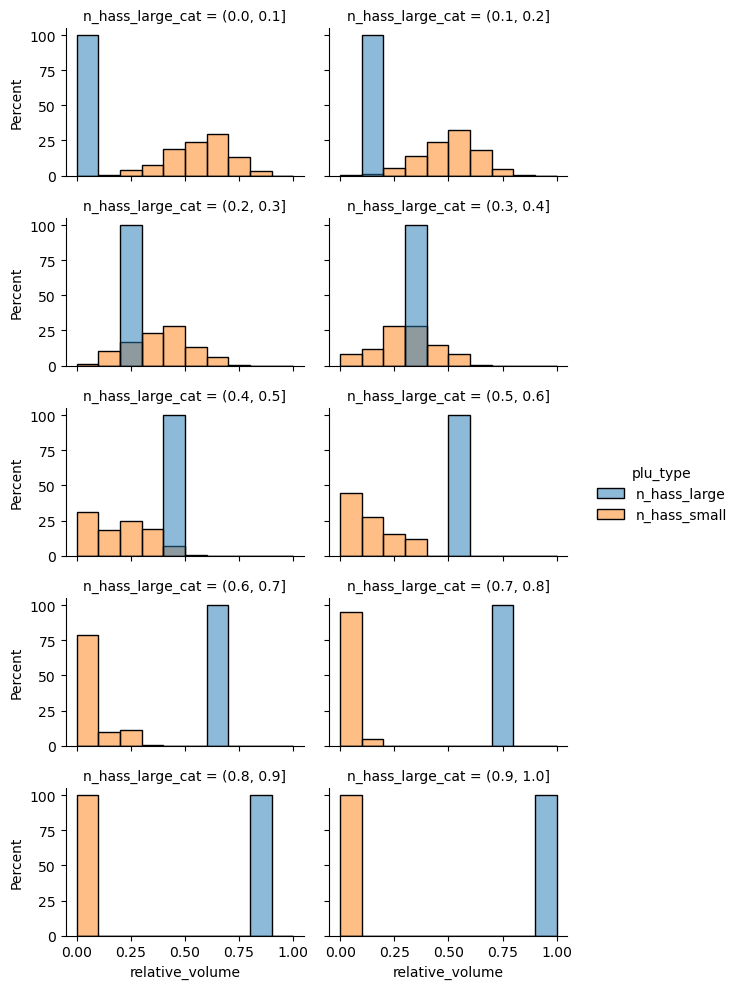

In [17]:
bins = np.linspace(0, 1, 11)
tmp["n_hass_large_cat"] = pd.cut(tmp["n_hass_large"], bins=bins)

tmp_melt = tmp.drop(columns=["total_volume", "n_hass_xlarge"])
tmp_melt = tmp_melt.melt(id_vars="n_hass_large_cat", var_name="plu_type",
                    value_name="relative_volume")

sns.displot(data=tmp_melt, x="relative_volume", hue="plu_type",
            col="n_hass_large_cat", stat="percent", col_wrap=2, height=2,
            aspect=1.5, common_norm=False, bins=bins)

**Conclusions**
- The volumes of `small_hass` and `large_hass` avocado types are highly related with the `total_volume` of avocado.
- Usually, the x`large_hass` avocado type don't aport significatively to the `total_volume` of avocado.
- Since the distributions for `small_hass` and `large_hass` avocado types are almost uniformly spread, it can be concluded that none of them is more responsible than the other for the total volume of avocado; it is usual to have both of them, and combined, they are responsible of more than 50\% of the total volume. 
- Although `small_hass` and `large_hass` are synced, if the proportion to the total volume for one of them increases the other decreases.
- Information in `small_hass` and `large_hass` is redundant with `total_volume`. These columns will be disregarded and replaced just with the `total_volume` col

In [18]:
sub_df["price_behavior"] = sub_df["price_behavior"].astype("category")
sub_df["price_behavior"] = sub_df["price_behavior"].cat.reorder_categories(["flat", "drop", "rise"])

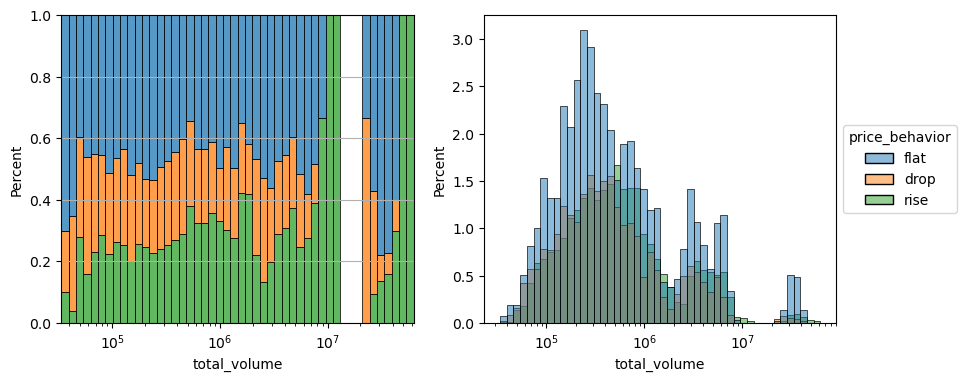

In [19]:
x_var = "total_volume"
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=sub_df, x=x_var, hue="price_behavior",
             log_scale=True, multiple="fill", ax=ax[0], stat="percent",
             legend=False)
ax[0].grid(axis="y")
sns.histplot(data=sub_df, x=x_var, hue="price_behavior",
             log_scale=True, stat="percent", ax=ax[1])
sns.move_legend(ax[1], "center left", bbox_to_anchor=(1, 0, 1, 1))


In [20]:
sub_df.drop(columns=["n_hass_large", "n_hass_small", "n_hass_xlarge"], inplace=True)

## About `prev_week_factor` columns

In [21]:
factors_cols = [
    "average_price_prev_week_factor", "total_volume_prev_week_factor",
    "n_hass_large_prev_week_factor", "n_hass_small_prev_week_factor",
    "n_hass_xlarge_prev_week_factor"
]

tmp = pd.DataFrame()
for col in factors_cols:
    tmp[col] = sub_df[col].apply(np.log)

tmp["price_behavior"] = sub_df["price_behavior"]

<Axes: >

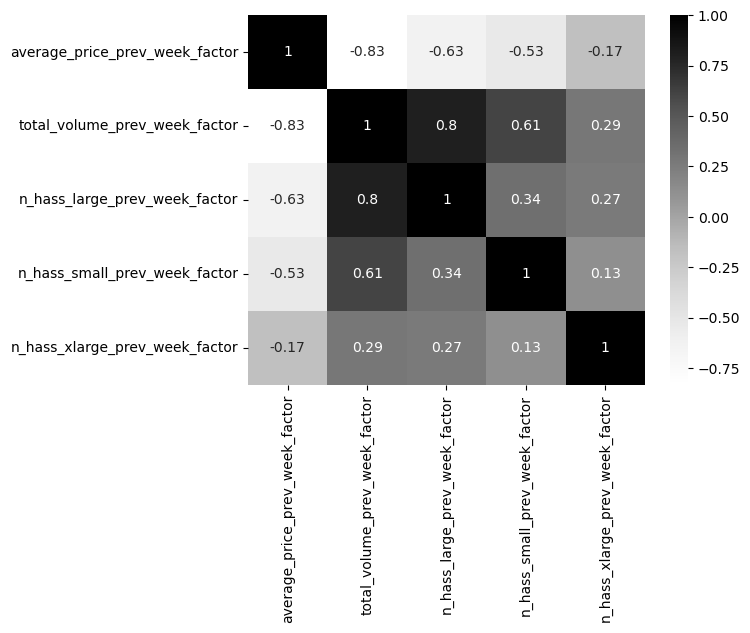

In [22]:
sns.heatmap(tmp[factors_cols].corr(), annot=True, cmap="Greys")

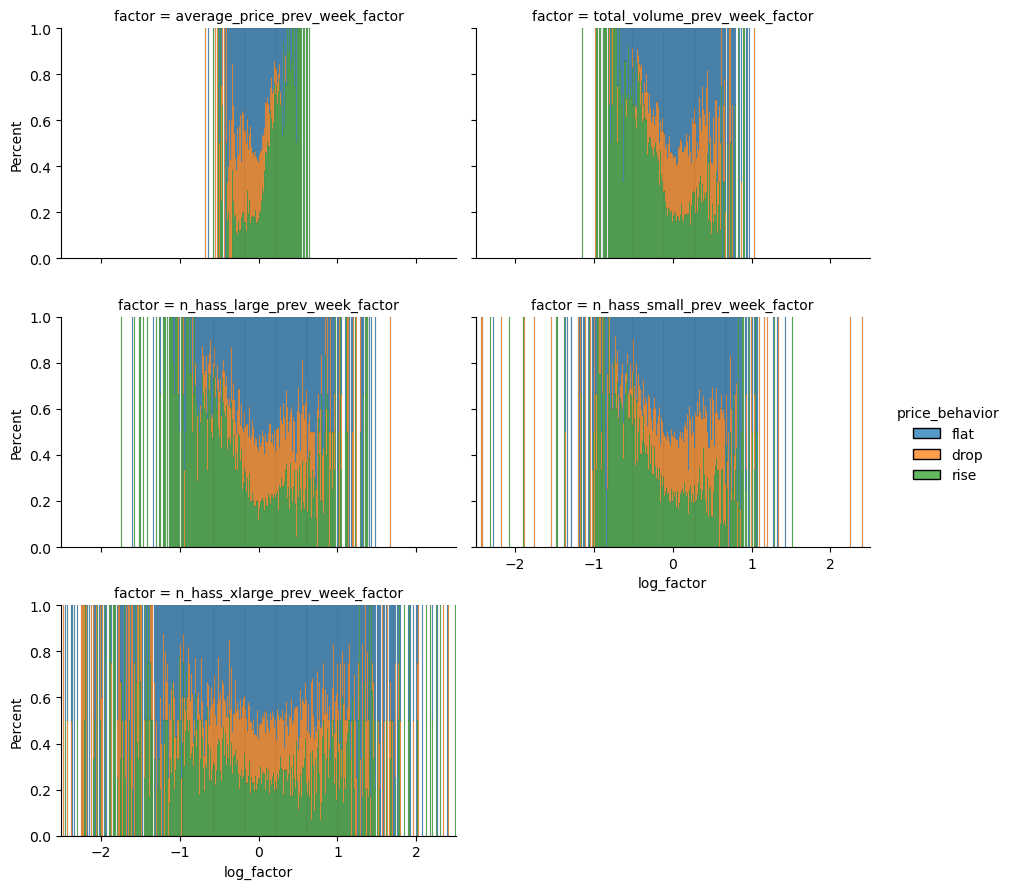

In [23]:
tmp_melt = tmp.melt(id_vars="price_behavior", var_name="factor", value_name="log_factor")

sns.displot(tmp_melt, x="log_factor", hue="price_behavior", multiple="fill",
            stat="percent", col="factor", col_wrap=2, aspect=1.5, height=3,
            binrange=(-2.5, 2.5))

# sns.histplot(data=tmp, x="n_hass_xlarge_prev_week_factor", hue="price_behavior", multiple="fill")

**Conclusions:**
- It looks like the price for next week tends to go up when the price in the last went down (i.e. `average_price_prev_week_factor` > 1)
- There is no clear trend to know for sure when the price should drop or stay the same.
- Working with the `ln` of the factors is better as this function converts these features in symmetrical variables (from their definition as $ \frac{prev \, week \, value} {current \, week \, value} $)

## Seasonal effects

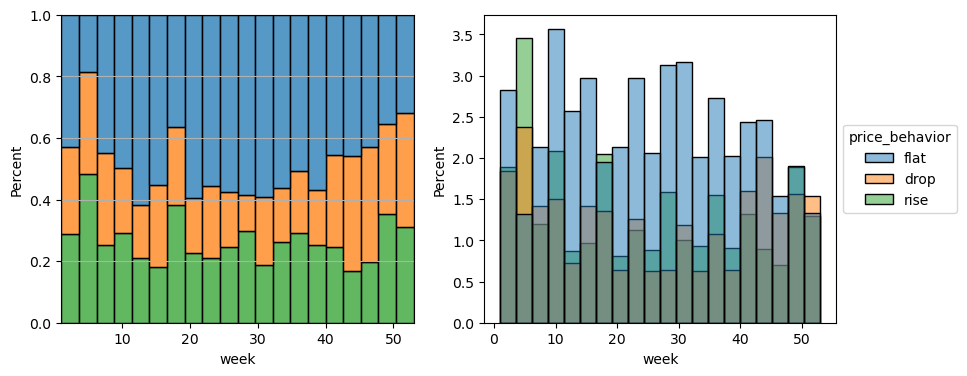

In [24]:
x_var = "week"
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=sub_df, x=x_var, hue="price_behavior",
             multiple="fill", ax=ax[0], stat="percent",
             legend=False)
ax[0].grid(axis="y")
sns.histplot(data=sub_df, x=x_var, hue="price_behavior",
             stat="percent", ax=ax[1])
sns.move_legend(ax[1], "center left", bbox_to_anchor=(1, 0, 1, 1))


**Conclusions:**
- There is a slight seasonal effect suggesting that there are some weeks of the year in which it is more likely for price of the avocado to stay the same.